<a href="https://colab.research.google.com/github/eskuilax/Anomalias/blob/main/Trabajo_Final_CGR_Chile_S_Benavente_fco_Parada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn import datasets
from scipy.stats import t, zscore
import random

In [25]:
np.random.seed(0)
x = np.random.exponential(size = 1000)
np.mean(x), np.var(x)

(1.003540208760709, 1.0590341339276639)

In [26]:
y, fitted_lambda = stats.boxcox(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


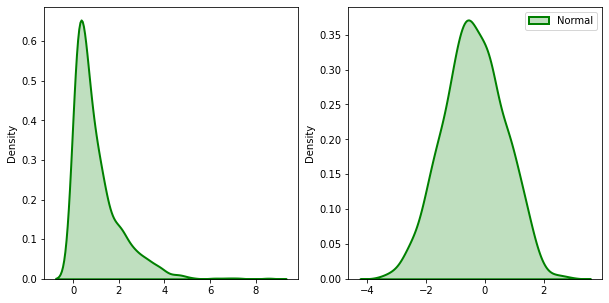

In [27]:
fig, ax = plt.subplots(1, 2)
# graficando la variable en su manera original y luego de transformada
sns.distplot(x, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(y, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},
label = "Normal", color ="green", ax = ax[1])
# Anadiendo leyenda a los gráficos
plt.legend(loc = "upper right")
# re-escalando los subplots
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

Lambda utilizado para la transformación: 0.2420131978174143


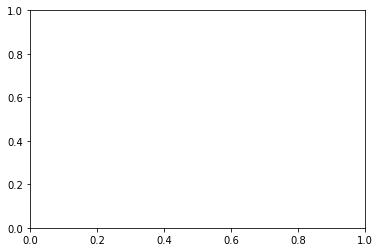

In [28]:
fig, ax = plt.subplots(1, 1)
print(f"Lambda utilizado para la transformación: {fitted_lambda}")

**1. a) El valor de lambda es:  0.2420131978174143**

---



In [29]:
def fivenum(x, range =  3, nan_remove = False):
  
  if(isinstance(x, list)):
    x = np.array(x)
  try:
    np.sum(x)
  except TypeError :
    print('Error: debe proveer una lista o un arreglo de sólo números')
  if(nan_remove == True):
      y = x[~np.isnan(x)]
      q1 = np.percentile(y, 25)
      q3 = np.percentile(y,75)
      md = np.median(y)
      RI = q3-q1
      lower_whisker = q1 - 1.5 * RI
      upper_whisker = q3 + 1.5 * RI
      lower_whisker = np.max([lower_whisker, np.min(y)])
      upper_whisker = np.min([upper_whisker, np.max(y)])
  else:
      q1 = np.percentile(x, 25)
      q3 = np.percentile(x,75)
      md = np.median(x)
      RI = q3-q1
      lower_whisker = q1 - 1.5 * RI
      upper_whisker = q3 + 1.5 * RI
      lower_whisker = np.max([lower_whisker, np.min(x)])
      upper_whisker = np.min([upper_whisker, np.max(x)])
  salida = np.array([lower_whisker, q1, md, q3, upper_whisker])
  return salida

In [30]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species']

fnums = fivenum(iris_df.sepal_width)
fnums

array([2.05, 2.8 , 3.  , 3.3 , 4.05])

**1. b) El numero de valores extremos identificados es: [2.05, 2.8 , 3.  , 3.3 , 4.05]**

In [31]:
regalias = pd.read_csv('regalias_viasterciarias.csv', index_col=0)

In [32]:
regalias.head()

,id_proyecto,nombre_del_proyecto,nombre_ocad,region,departamento,sector_suifp,programa,subprograma,avance_fisico,avance_financiero,estado_detalle,estado_general,anno,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr
1,id_357417,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,1784417,0,0,1784417,100.0
2,id_357587,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,756224,0,0,756224,100.0
3,id_701595,MEJORAMIENTO DE VÍAS TERCIARIAS EN LOS MUNICIP...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.95,Cerrado,Terminado,2018,1605476,0,333,1605809,100.0
4,id_274786,MEJORAMIENTO Y OPTIMIZACIÓN DE VIAS TERCIARIAS...,Antioquia - Arboletes,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.99,Cerrado,Terminado,2016,210743,0,0,210743,100.0
5,id_592358,ESTUDIOS Y DISEÑOS PARA EL MEJORAMIENTO DE LA...,Caracoli,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2018,31667,0,0,31667,100.0


In [33]:
iris_df['outlier_sw'] = iris_df['sepal_width'].apply(lambda x: 'outlier' if (x < fnums[0]) | (x > fnums[4]) else 'no_outlier')
iris_df.outlier_sw.value_counts()

no_outlier    146
outlier         4
Name: outlier_sw, dtype: int64

**1. c) El número de valor extremo es: 4**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import random
from plotnine import ggplot, geom_point, aes, geom_abline

In [37]:
np.random.seed(42)
# datos de entrenamiento: 2100 numeros aleatorias de distribución normal
# con media cero y desviacion estandar 0.3
X_inliers = np.random.normal(0, 0.3, 200)
# Se convierte a 100 duplas para generar un scatter plot de 2 ejes
X_inliers = np.reshape(X_inliers, (-1, 2))
# Se concatenan, creando 200 duplas.
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
# Generacion de 20 duplas de outliers (10%) de números aleatorios entre -4 y 4
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# Se concatenan en la variable X
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
## Crea un arreglo de "unos" de la misma longitud que X
etiqueta = np.ones(len(X), dtype=int)
# Le asigna la etiqueta -1 a los outliers (los 20 ultimos)
etiqueta[-n_outliers:] = -1
etiqueta

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [38]:
# ajuste el modelo
clf = LocalOutlierFactor(n_neighbors = 5, contamination = 0.1) # esto es para que identifique un 10% de datos outliers
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
y_pred = clf.fit_predict(X)
n_errors = (y_pred != etiqueta).sum()
X_scores = clf.negative_outlier_factor_ # El valor Local Outlier Factor (en este caso no hay umbral por que busca identificar el 10% de outliers)
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"

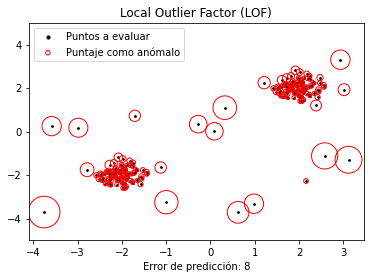

In [39]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos a evaluar')
# los circulos son proporcionales al puntaje de outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
facecolors='none', label='Puntaje como anómalo')
plt.axis('tight')
plt.ylim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("Error de predicción: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(etiqueta, y_pred)
cm

array([[ 17,   3],
       [  5, 195]])

**2. a) El número de valores outliers identificados son: 17,3 y 5,195.**

**2. b) El proyecto con mayor del valor LOF es: 17,3**

In [41]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length',
'petal_width', 'species']

In [46]:
clf = LocalOutlierFactor(n_neighbors = 5, novelty = False)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = iris_df[['sepal_length', 'sepal_width']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier_5 = lof_scores > 3
unique, counts = np.unique(outlier_5, return_counts=True)
unique, counts
lof_scores
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"

array([1.04065244, 1.04693845, 0.99666581, 1.09231647, 1.15501532,
       1.02705947, 1.11235314, 0.95857864, 1.1936053 , 1.00732885,
       1.25108715, 1.37121627, 0.8826962 , 1.20785736, 1.20302214,
       1.47956634, 1.02705947, 1.04065244, 1.09518172, 1.11580787,
       1.31776622, 1.1789288 , 1.38549431, 1.20393785, 1.37121627,
       1.07487954, 0.95857864, 1.14827183, 1.16251649, 0.99666581,
       1.03351818, 1.31776622, 1.19492345, 1.09461963, 1.00732885,
       1.10977831, 1.33004091, 1.47154987, 1.12651288, 0.91045695,
       0.91422713, 1.18568923, 1.0278073 , 0.91422713, 1.11580787,
       0.8826962 , 1.11580787, 1.03327614, 1.14784524, 1.1236453 ,
       1.04291544, 0.91486101, 0.99356122, 1.12532437, 0.98755528,
       1.05686518, 1.03835993, 1.07750527, 1.01327046, 1.62783685,
       1.31753232, 1.17028278, 1.32617591, 1.0343497 , 1.031543  ,
       0.97511055, 1.08078548, 0.95627191, 1.20829062, 1.07295727,
       1.43285892, 0.9776265 , 1.31092784, 0.9776265 , 0.97511

In [48]:
clf = LocalOutlierFactor(n_neighbors = 5, novelty = False)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = iris_df[['sepal_length', 'sepal_width']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier_15 = (lof_scores > 2)+0
unique, counts = np.unique(outlier_15, return_counts=True)
unique, counts
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"
outlier_15

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
iris_df['outlier_15'] = outlier_15

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


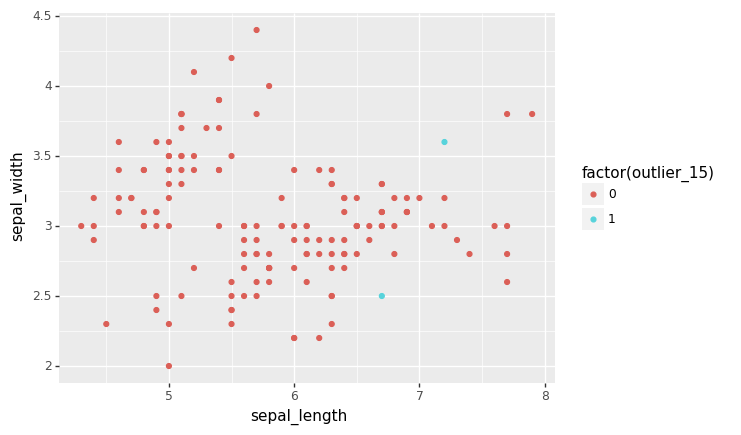

<ggplot: (8778268590417)>

In [51]:
(ggplot(iris_df, aes('sepal_length', 'sepal_width', color = 'factor(outlier_15)'))
+ geom_point())

**2. c) El número de valores oulier identificados son: 2**

In [52]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv('regalias_viasterciarias.csv')
df.head(6)

,Unnamed: 0,id_proyecto,nombre_del_proyecto,nombre_ocad,region,departamento,sector_suifp,programa,subprograma,avance_fisico,avance_financiero,estado_detalle,estado_general,anno,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr
0,1,id_357417,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,1784417,0,0,1784417,100.0
1,2,id_357587,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,756224,0,0,756224,100.0
2,3,id_701595,MEJORAMIENTO DE VÍAS TERCIARIAS EN LOS MUNICIP...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.95,Cerrado,Terminado,2018,1605476,0,333,1605809,100.0
3,4,id_274786,MEJORAMIENTO Y OPTIMIZACIÓN DE VIAS TERCIARIAS...,Antioquia - Arboletes,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.99,Cerrado,Terminado,2016,210743,0,0,210743,100.0
4,5,id_592358,ESTUDIOS Y DISEÑOS PARA EL MEJORAMIENTO DE LA...,Caracoli,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2018,31667,0,0,31667,100.0
5,6,id_1062076,ELABORACIÓN DE ESTUDIOS Y DISEÑOS DE LA VÍA DE...,Antioquia - Cisneros,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,90.00,Cerrado,Terminado,2020,7667,0,0,7667,100.0


In [61]:
model=IsolationForest(n_estimators = 10, max_samples = 'auto', \
contamination = float(0.1), max_features = 1.0)
model.fit(df[['valor_sgr']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=10,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [63]:
df['puntaje'] = model.decision_function(df[['valor_sgr']])
df['anomalo'] = model.predict(df[['valor_sgr']])
df[["valor_sgr", "puntaje", "anomalo"]].head(6)

,valor_sgr,puntaje,anomalo
0,1784417,-0.179837,-1
1,756224,0.042512,1
2,1605476,-0.123048,-1
3,210743,0.126802,1
4,31667,0.041440,1
5,7667,-0.042835,-1


In [64]:
anomalia = df.loc[df['anomalo'] == -1]
anomalia_index = list(anomalia.index)
print(anomalia)

     Unnamed: 0 id_proyecto  ... anomalo outlier
0             1   id_357417  ...      -1       0
2             3   id_701595  ...      -1       0
5             6  id_1062076  ...      -1       0
6             7   id_706853  ...      -1       0
15           16  id_1067153  ...      -1       0
19           20   id_324697  ...      -1       1
41           42   id_377796  ...      -1       0
46           47   id_290778  ...      -1       1
62           63   id_638485  ...      -1       1
68           69   id_274220  ...      -1       1
77           78   id_980719  ...      -1       0
81           82   id_589468  ...      -1       0
87           88   id_498470  ...      -1       0
90           91   id_498626  ...      -1       0
92           93   id_554202  ...      -1       0
101         102   id_369942  ...      -1       0
114         115   id_500829  ...      -1       0
141         142   id_453236  ...      -1       0
194         195   id_352785  ...      -1       0
196         197   id

In [65]:
clf = LocalOutlierFactor(n_neighbors = 3, novelty = False, contamination = 0.2)
# use fit_predict para calcular el número de errores al comparar
# con las etiquetas asignadas a la muestra de entrenamiento.
X = df[['valor_sgr', 'valor_nación',	'valor_otros',	'pctg_sgr']]
y_pred = clf.fit_predict(X)
lof_scores = -1 * clf.negative_outlier_factor_
outlier = (lof_scores > 2)+0
unique, counts = np.unique(outlier_15, return_counts=True)
unique, counts
# np.random.choice(X_scores, 20) # Vea una muestra de "puntajes"
outlier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
df['outlier'] = outlier
df.head()

,Unnamed: 0,id_proyecto,nombre_del_proyecto,nombre_ocad,region,departamento,sector_suifp,programa,subprograma,avance_fisico,avance_financiero,estado_detalle,estado_general,anno,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,puntaje,anomalo,outlier
0,1,id_357417,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,1784417,0,0,1784417,100.0,-0.179837,-1,0
1,2,id_357587,CONSTRUCCIÓN DE PLACA HUELLA EN VÍAS TERCIARIA...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2017,756224,0,0,756224,100.0,0.042512,1,0
2,3,id_701595,MEJORAMIENTO DE VÍAS TERCIARIAS EN LOS MUNICIP...,Región Eje Cafetero,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.95,Cerrado,Terminado,2018,1605476,0,333,1605809,100.0,-0.123048,-1,0
3,4,id_274786,MEJORAMIENTO Y OPTIMIZACIÓN DE VIAS TERCIARIAS...,Antioquia - Arboletes,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,99.99,Cerrado,Terminado,2016,210743,0,0,210743,100.0,0.126802,1,0
4,5,id_592358,ESTUDIOS Y DISEÑOS PARA EL MEJORAMIENTO DE LA...,Caracoli,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.0,100.00,Cerrado,Terminado,2018,31667,0,0,31667,100.0,0.041440,1,0


In [67]:
df.loc[df.outlier == 1]

,Unnamed: 0,id_proyecto,nombre_del_proyecto,nombre_ocad,region,departamento,sector_suifp,programa,subprograma,avance_fisico,avance_financiero,estado_detalle,estado_general,anno,valor_sgr,valor_nación,valor_otros,total_proyecto,pctg_sgr,puntaje,anomalo,outlier
13,14,id_1011939,"MEJORAMIENTO DE VÍAS RURALES, PARA EL DESARROL...",Antioquia - San Vicente,Eje Cafetero,Antioquia,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,100.00,Cerrado,Terminado,2019,206234,0,239718,445952,46.2,0.113446,1,1
19,20,id_324697,MEJORAMIENTO EN PAVIMENTO ASFÁLTICO DE LA VÍA ...,Región Caribe,Caribe,Bolívar,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,100.00,Cerrado,Terminado,2017,18193397,0,0,18193397,100.0,-0.380267,-1,1
20,21,id_625428,CONSTRUCCIÓN DE PLACA HUELLA EN LA VÍA QUE COM...,Bolivar - El Guamo,Caribe,Bolívar,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,99.89,Cerrado,Terminado,2018,382754,0,53387,436140,87.8,0.079067,1,1
22,23,id_812308,MEJORAMIENTO DE RED VIAL TERCIARIA EN LA VERED...,Boyaca - Cucaita,Centro Oriente,Boyacá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,92.53,Cerrado,Terminado,2019,157205,0,28120,185324,84.8,0.088953,1,1
23,24,id_1028007,"MEJORAMIENTO DE LA VÍA LLUVIOSOS - ESCALONES, ...",Boyaca - Cucaita,Centro Oriente,Boyacá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,99.97,Cerrado,Terminado,2019,58488,0,3509,61997,94.3,0.019761,1,1
27,28,id_370367,MEJORAMIENTO DE LA VÍA TERCIARIA RINCÓN DE LAS...,Boyaca - Nobsa,Centro Oriente,Boyacá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,95.82,Cerrado,Terminado,2017,433333,0,161476,594810,72.9,0.058526,1,1
28,29,id_277866,MEJORAMIENTO DE VÍAS TERCIARIAS MEDIANTE EL US...,Boyaca - Puerto Boyaca,Centro Oriente,Boyacá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,22.29,21.72,Cerrado,Terminado,2017,458265,0,0,458265,100.0,0.084113,1,1
29,30,id_355264,CONSTRUCCIÓN DE PAVIMENTO EN CONCRETO RÍGIDO E...,Boyaca - Puerto Boyaca,Centro Oriente,Boyacá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,99.18,Cerrado,Terminado,2017,513608,0,0,513608,100.0,0.098158,1,1
42,43,id_699045,ESTUDIOS Y DISEÑOS PARA EL MEJORAMIENTO DE VÍA...,Caldas - La Merced,Eje Cafetero,Caldas,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,100.00,Cerrado,Terminado,2018,22771,0,0,22771,100.0,0.009977,1,1
46,47,id_290778,"MEJORAMIENTO DE VÍAS TERCIARIAS, MEDIANTE EL U...",Región Centro Sur,Centro Sur,Caquetá,Transporte,Infraestructura Red Vial Regional,Red Vial Terciaria,100.00,99.85,Cerrado,Terminado,2017,1276430,3333333,0,4609764,27.7,-0.058914,-1,1


**3. a) El número de proyectos que coinciden con el 10% de los proyectos con layor LOF es: 21**